# Пример понижения размерности с помощью PCA

In [1]:
import numpy as np

In [2]:
train = np.loadtxt('../002/data/digit/train.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.reshape(train[:, 1:], (len(train[:, 1:]), 28, 28))

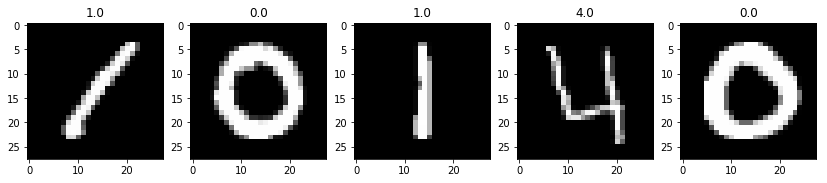

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [5]:
len(train_img)

42000

In [10]:
28 * 28

784

In [47]:
choices = np.random.choice(train_img.shape[0], 10000)

y = train_label[choices]
X = train_img[choices].reshape(-1, 28 * 28).astype(np.float32)

In [48]:
# центрируем данные
mean = X.mean(axis=0)
X -= mean

In [49]:
# матрица ковариации признаков
cov = np.dot(X.T, X) / X.shape[0]

In [50]:
cov.shape

(784, 784)

In [51]:
U, S, _ = np.linalg.svd(cov)
# U - собсвенные вектора матрицы ковариации
# S - собственные значения

In [52]:
S.shape

(784,)

## Собственные числа

In [53]:
for i in range(5):
    print('[%03d] %.3f' % (i + 1, np.sum(S[0:i + 1])/ np.sum(S)))

[001] 0.097
[002] 0.168
[003] 0.230
[004] 0.283
[005] 0.332


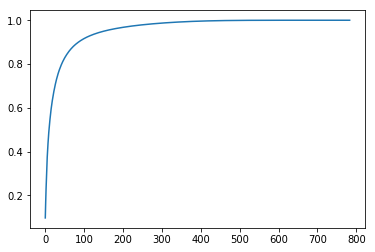

In [54]:
plt.plot([np.sum(S[0:i + 1])/ np.sum(S) for i in range(S.shape[0])])

## Понижаем размерность

In [55]:
n_comp = 100
Xrot_reduced = np.dot(X, U[:, :n_comp])

In [56]:
Xrot_reduced.shape

(10000, 100)

## Восстанавливаем изображение после понижения размерности

In [57]:
Xrot_restored = np.dot(Xrot_reduced, U[:,:n_comp].T)

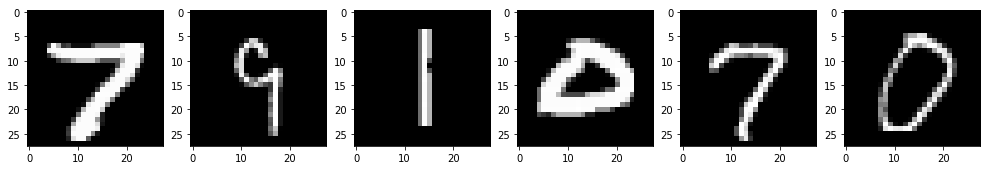

In [60]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(X[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img += mean
    plt.imshow(img.reshape((28,28)), cmap='gray');

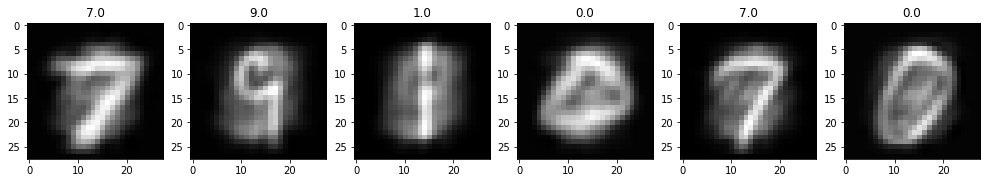

In [64]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(Xrot_restored[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img += mean
    plt.title('%s' % y[i-1])
    plt.imshow(img.reshape((28,28)), cmap='gray');

## Визуализация собственных векторов

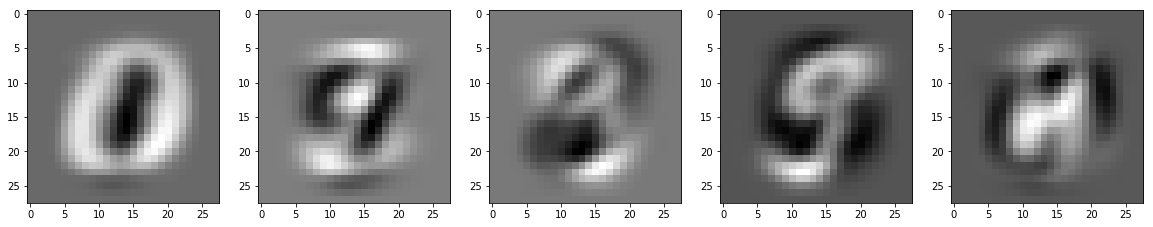

In [46]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(U.T[:5, :], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img.reshape((28,28)), cmap='gray');

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(Xrot_reduced[:1000], y[:1000])

In [69]:
pred = logreg.predict(Xrot_reduced[:100])

In [70]:
pred[:100]

array([ 7.,  9.,  1.,  0.,  7.,  0.,  4.,  6.,  2.,  9.,  7.,  0.,  4.,
        9.,  2.,  1.,  8.,  6.,  8.,  1.,  4.,  9.,  9.,  2.,  9.,  8.,
        5.,  8.,  8.,  1.,  3.,  4.,  7.,  6.,  5.,  6.,  2.,  7.,  4.,
        0.,  1.,  7.,  6.,  4.,  7.,  7.,  1.,  7.,  9.,  7.,  6.,  7.,
        6.,  1.,  4.,  3.,  3.,  4.,  0.,  5.,  2.,  8.,  2.,  4.,  2.,
        9.,  6.,  3.,  3.,  5.,  9.,  0.,  5.,  6.,  1.,  6.,  6.,  6.,
        2.,  8.,  5.,  1.,  7.,  9.,  9.,  9.,  3.,  5.,  8.,  9.,  9.,
        1.,  1.,  0.,  8.,  5.,  0.,  3.,  8.,  1.])

In [71]:
y[:100]

array([ 7.,  9.,  1.,  0.,  7.,  0.,  4.,  6.,  2.,  9.,  7.,  0.,  4.,
        9.,  2.,  1.,  8.,  6.,  8.,  1.,  4.,  9.,  9.,  2.,  9.,  8.,
        5.,  8.,  8.,  1.,  3.,  4.,  7.,  6.,  5.,  6.,  2.,  7.,  4.,
        0.,  1.,  7.,  6.,  4.,  7.,  7.,  1.,  7.,  9.,  7.,  6.,  7.,
        6.,  1.,  4.,  3.,  3.,  4.,  0.,  5.,  2.,  8.,  2.,  4.,  2.,
        9.,  6.,  3.,  3.,  5.,  9.,  0.,  5.,  6.,  1.,  6.,  6.,  6.,
        2.,  8.,  5.,  1.,  7.,  9.,  9.,  9.,  3.,  5.,  8.,  9.,  9.,
        1.,  1.,  0.,  8.,  5.,  0.,  3.,  8.,  1.])

In [78]:
np.sum(np.nonzero(y[:100]-pred[:100]))

0